In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scr.mymodule.database import get_db_connection

In [1]:
def get_l0_comments_filtered(query):
    # Establish a connection to the PostgreSQL database
    conn = get_db_connection("scr/config.ini")
    # Execute the query
    df = pd.read_sql(query, conn)

    # Close the database connection
    conn.close()

    # Return the resulting DataFrame
    return df


In [3]:
query = "SELECT lc.* FROM l0_comments_filtered lc"
df = get_l0_comments_filtered(query)

In [5]:
df.shape

(1006754, 16)

In [20]:
df.head(2)

,comment_date,clean_text,link_id,parent_id,comment_id,author,created_utc,num_comments,over_18,is_self,score,selftext,stickied,subreddit,subreddit_id,title,month,day
0,06/04/2020,i am going through some really tough and dark ...,t3_fvmd4p,t3_fvmd4p,fmliyi4,_WalksAlone_,2020-04-06 15:35:42,None,None,None,1,None,False,GetMotivated,t5_2rmfx,None,2020-04,2020-04-06
1,06/04/2020,dont aim to be the last man brother aim to be ...,t3_fvqnj0,t1_fml496m,fmllxda,_WalksAlone_,2020-04-06 16:02:52,None,None,None,1,None,False,GetMotivated,t5_2rmfx,None,2020-04,2020-04-06


In [7]:
df.columns

Index(['comment_date', 'clean_text', 'link_id', 'parent_id', 'comment_id',
       'author', 'created_utc', 'num_comments', 'over_18', 'is_self', 'score',
       'selftext', 'stickied', 'subreddit', 'subreddit_id', 'title'],
      dtype='object')

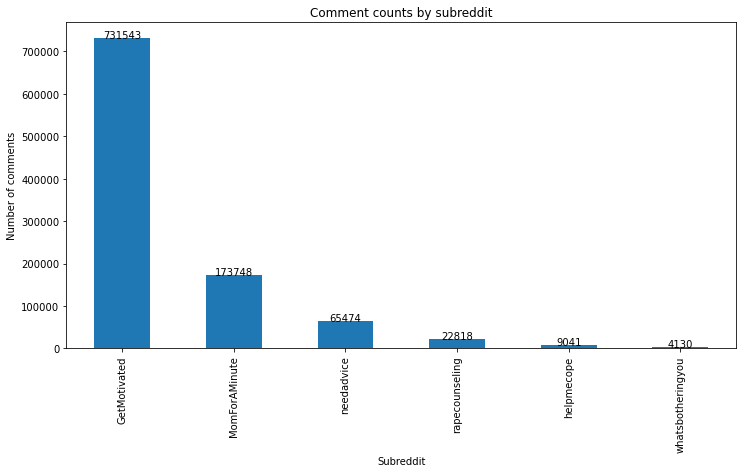

In [9]:
import matplotlib.pyplot as plt

# Group the comments by subreddit and count the number of comments in each group
subreddit_counts = df.groupby('subreddit').size().sort_values(ascending=False)

# Plot a bar chart of the subreddit counts
ax = subreddit_counts.plot(kind='bar', figsize=(12,6))
ax.set_xlabel('Subreddit')
ax.set_ylabel('Number of comments')
ax.set_title('Comment counts by subreddit')

# Add the count of each bar to the chart
for i, v in enumerate(subreddit_counts):
    ax.text(i, v, str(v), ha='center', fontsize=10)

plt.show()


In [10]:
import matplotlib.pyplot as plt

def plot_bar_chart(df, groupby_col, limit=10):
    # Group the data by the specified column and count the number of rows in each group
    group_counts = df.groupby(groupby_col).size().sort_values(ascending=False)
    
    # Limit the number of bars to the specified limit
    group_counts = group_counts[:limit]
    
    # Create the bar chart
    ax = group_counts.plot(kind='bar', figsize=(12,6))
    ax.set_xlabel(groupby_col)
    ax.set_ylabel('Number of comments')
    ax.set_title(f'Comment counts by {groupby_col}')
    
    # Add the count of each bar to the chart
    for i, v in enumerate(group_counts):
        ax.text(i, v, str(v), ha='center', fontsize=10)

    plt.show()


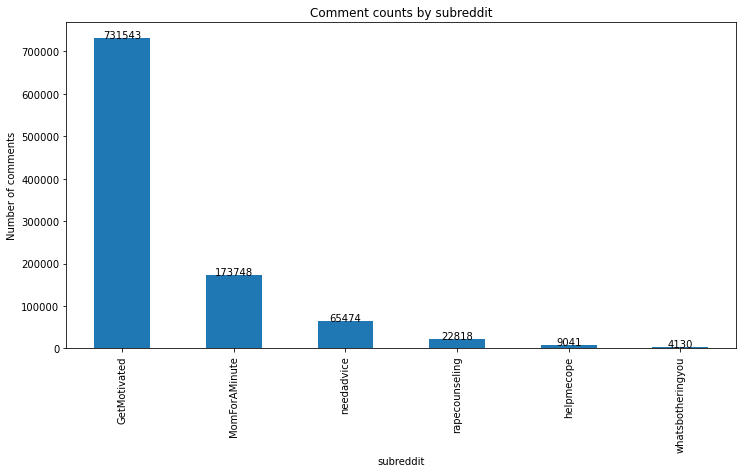

In [11]:
plot_bar_chart(df, 'subreddit')

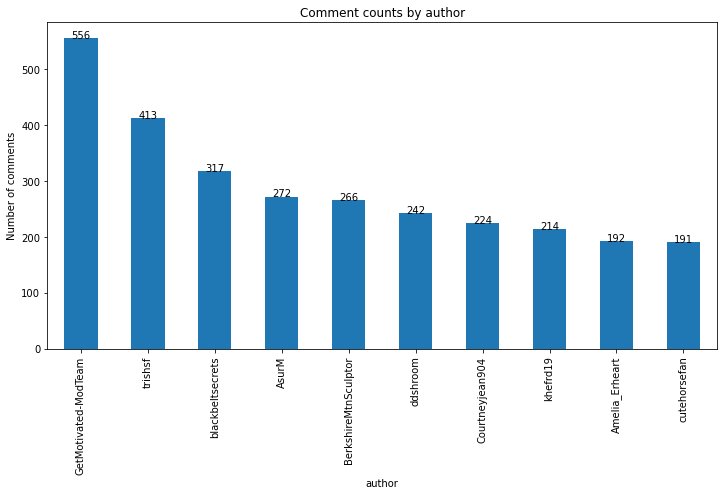

In [12]:
plot_bar_chart(df, 'author')

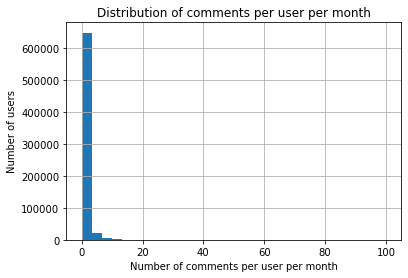

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'created_utc' column to a datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Add a new column for the month of each comment
df['month'] = df['created_utc'].dt.strftime('%Y-%m')

# Group the comments by author and month, and count the number of comments in each group
author_month_counts = df.groupby(['author', 'month']).size().reset_index(name='count')


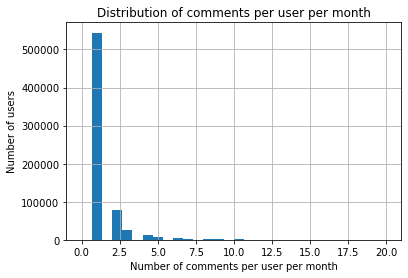

In [14]:
# Plot a histogram of the number of comments per user per month
author_month_counts.hist(column='count', bins=30, range=[0,20])

plt.xlabel('Number of comments per user per month')
plt.ylabel('Number of users')
plt.title('Distribution of comments per user per month')

plt.show()

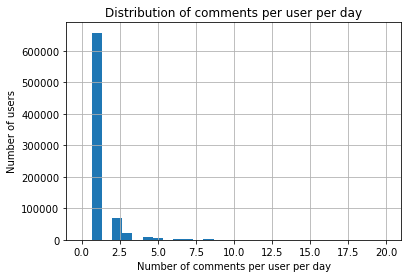

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'created_utc' column to a datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Add a new column for the day of each comment
df['day'] = df['created_utc'].dt.date

# Group the comments by author and day, and count the number of comments in each group
author_day_counts = df.groupby(['author', 'day']).size().reset_index(name='count')

# Plot a histogram of the number of comments per user per day
author_day_counts.hist(column='count', bins=30, range=[0,20])

plt.xlabel('Number of comments per user per day')
plt.ylabel('Number of users')
plt.title('Distribution of comments per user per day')

plt.show()


In [17]:
# Convert the 'created_utc' column to a datetime format
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

# Add a new column for the day of each comment
df['day'] = df['created_utc'].dt.date

# Create a pivot table to count the number of comments by day
comments_by_day = df.pivot_table(index='day', values='comment_id', aggfunc='count')

# Print the resulting table
print(comments_by_day)


            comment_id
day                   
2018-01-01        1002
2018-01-02         714
2018-01-03         648
2018-01-04         787
2018-01-05         822
...                ...
2022-12-27         844
2022-12-28        1125
2022-12-29        1127
2022-12-30        1662
2022-12-31        1251

[1814 rows x 1 columns]


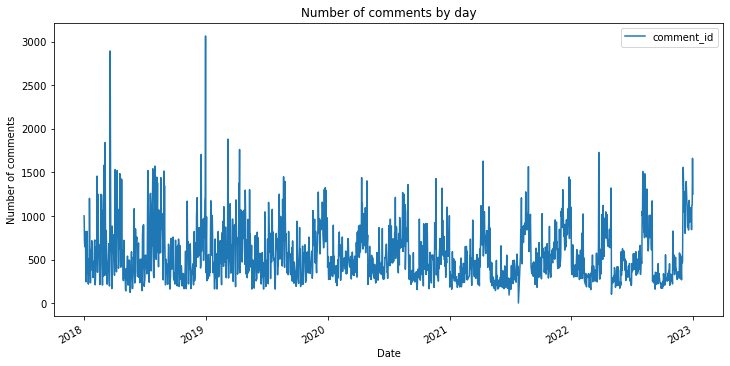

In [18]:
# Convert the 'day' column to a datetime format
comments_by_day.index = pd.to_datetime(comments_by_day.index)

# Plot a line chart of the number of comments by day
comments_by_day.plot(kind='line', figsize=(12,6))

# Add labels and a title to the chart
plt.xlabel('Date')
plt.ylabel('Number of comments')
plt.title('Number of comments by day')

plt.show()


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_chart(df, groupby_col, limit=10, order_col=None, ascending=True, chart_type='bar', figsize=(12,6)):
    # Group the data by the specified column and count the number of rows in each group
    group_counts = df.groupby(groupby_col).size()
    
    # Sort the results by the specified order column and order direction
    if order_col is not None:
        group_counts = group_counts.sort_values(ascending=ascending)
    
    # Limit the number of bars to the specified limit
    group_counts = group_counts[:limit]
    
    # Create the chart
    if chart_type == 'bar':
        ax = group_counts.plot(kind='bar', figsize=figsize)
    elif chart_type == 'line':
        ax = group_counts.plot(kind='line', figsize=figsize)
    else:
        raise ValueError(f'Invalid chart type "{chart_type}"')
    
    ax.set_xlabel(groupby_col)
    ax.set_ylabel('Number of comments')
    ax.set_title(f'Comment counts by {groupby_col}')
    sns.despine()
    
    # Add the count of each bar to the chart
    if chart_type == 'bar':
        for i, v in enumerate(group_counts):
            ax.text(i, v, str(v), ha='center', fontsize=10)
    
    plt.show()


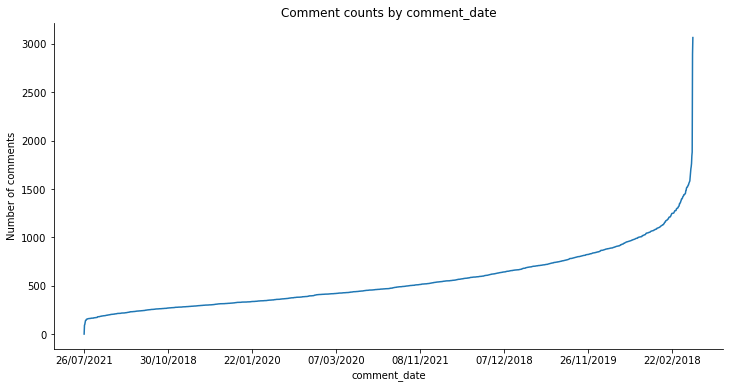

In [32]:
plot_chart(df, 'comment_date', order_col='comment_date', ascending=True, chart_type='line', figsize=(12,6), limit=2000)

In [34]:
group_counts = df.groupby('comment_date').size()

In [36]:
group_counts   

pandas.core.series.Series

In [37]:
group_counts = df.groupby('comment_date').size()
group_counts_sorted = group_counts.sort_index()


In [38]:
group_counts_sorted = group_counts.sort_index(ascending=False)


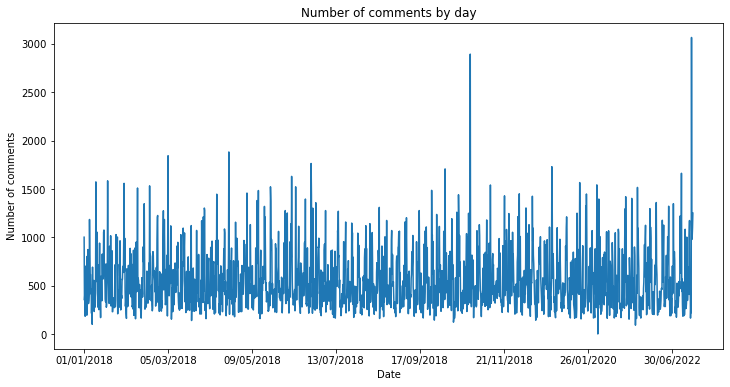

In [40]:
# Count the number of comments by day
comments_by_day = df.groupby('comment_date').size()

# Sort the series by date
comments_by_day = comments_by_day.sort_index()

# Create a line chart
ax = comments_by_day.plot(kind='line', figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Number of comments')
ax.set_title('Number of comments by day')
plt.show()


In [44]:
min_date = df['comment_date'].min()
max_date = df['comment_date'].max()
min_date, max_date

('01/01/2018', '31/12/2022')

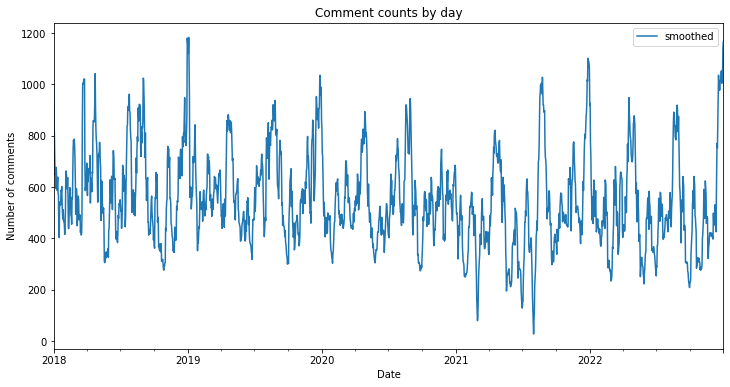

In [46]:
# Convert the comment_date column to a datetime format
df['comment_date'] = pd.to_datetime(df['comment_date'])

# Count the number of comments by day and sort by date
daily_counts = df.groupby(pd.Grouper(key='comment_date', freq='D')).size().reset_index(name='count').sort_values('comment_date')

# Smooth the line chart using rolling average
daily_counts['smoothed'] = daily_counts['count'].rolling(7, min_periods=1).mean()

# Plot the smoothed line chart
ax = daily_counts.plot(x='comment_date', y='smoothed', figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Number of comments')
ax.set_title('Comment counts by day')
plt.show()


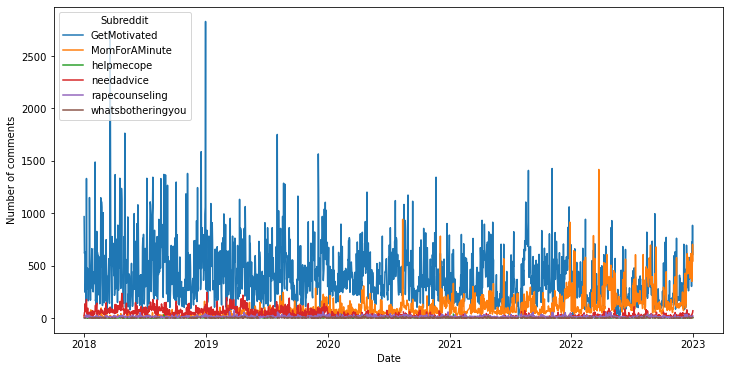

In [47]:
# Convert the comment_date column to a datetime object
df['comment_date'] = pd.to_datetime(df['comment_date'])

# Group the data by subreddit and comment_date, and count the number of comments in each group
grouped = df.groupby(['subreddit', 'comment_date']).size()

# Unstack the grouped DataFrame to create a separate column for each subreddit
unstacked = grouped.unstack('subreddit')

# Plot each column as a separate line on the same chart
fig, ax = plt.subplots(figsize=(12, 6))

for column in unstacked.columns:
    ax.plot(unstacked.index, unstacked[column], label=column)

# Add axis labels and a legend
ax.set_xlabel('Date')
ax.set_ylabel('Number of comments')
ax.legend(title='Subreddit', loc='upper left')

# Show the plot
plt.show()


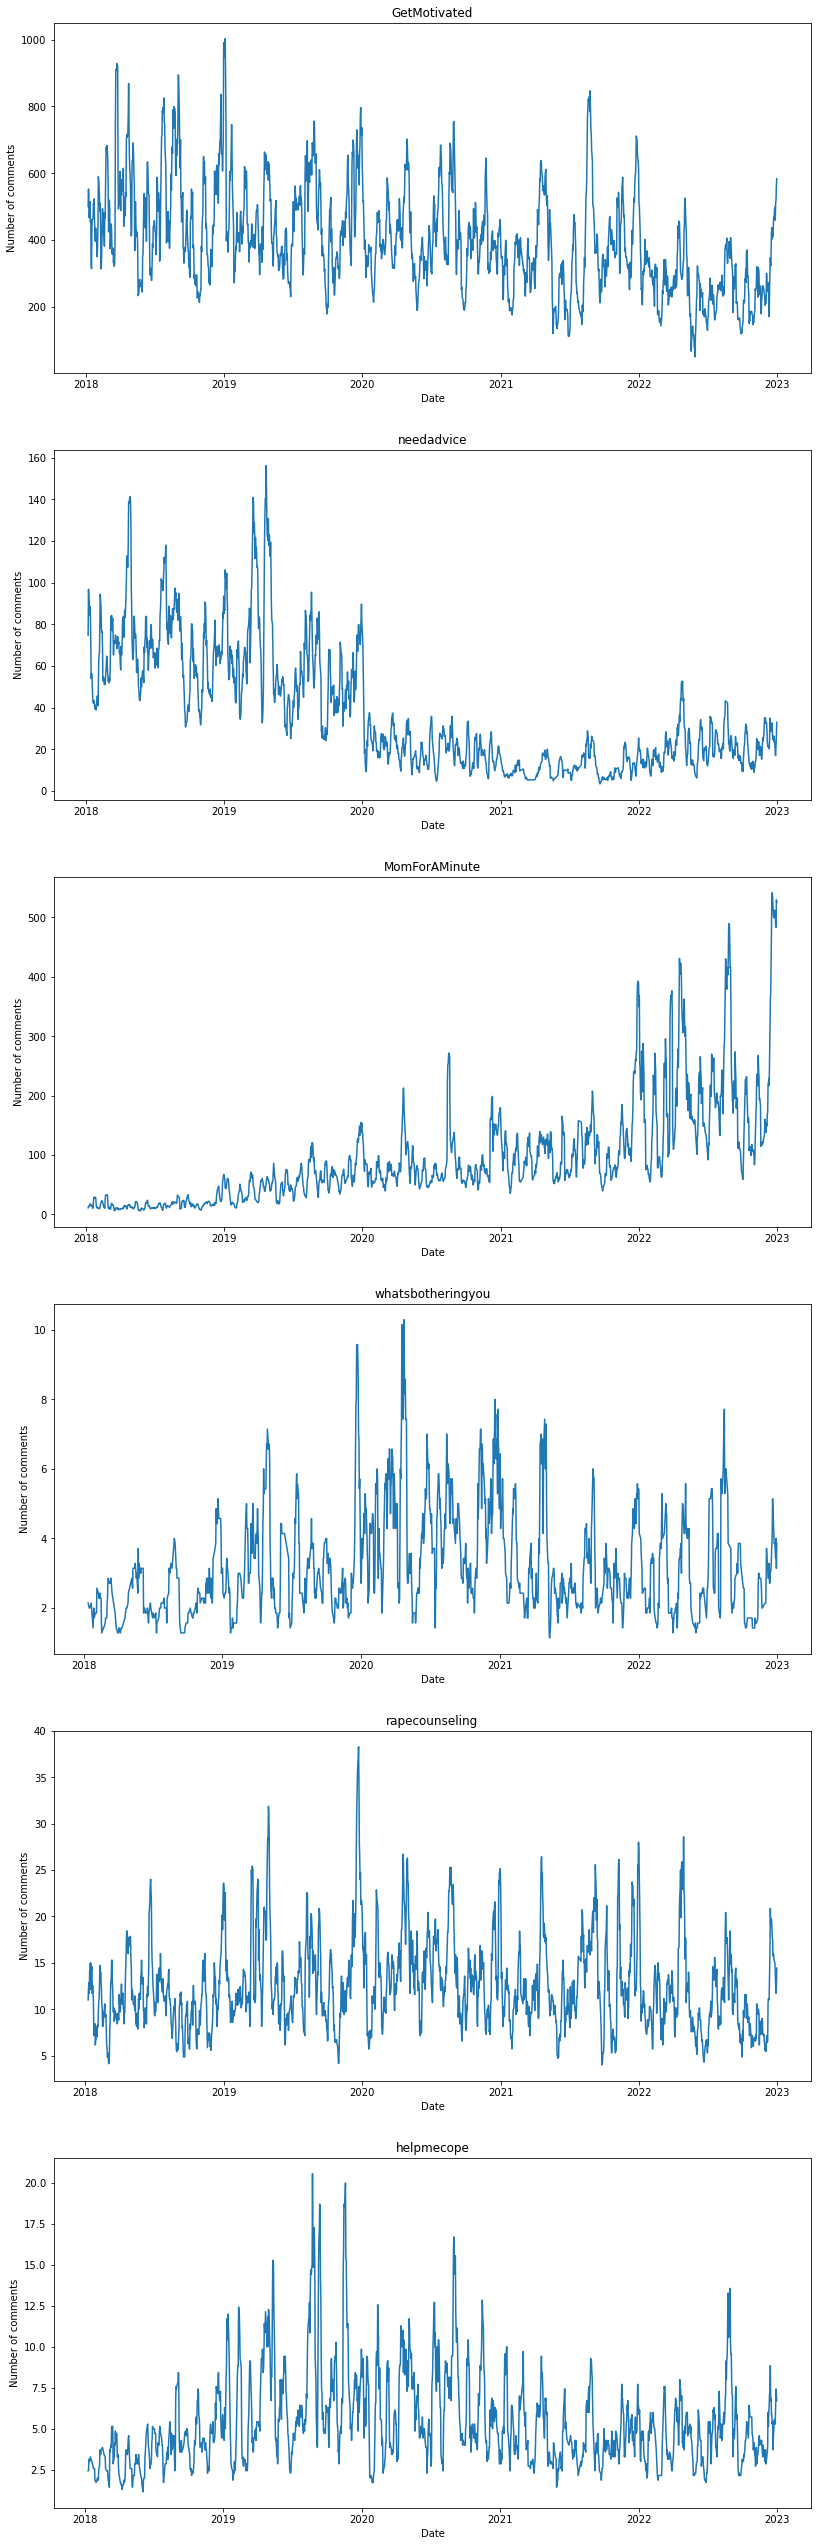

In [48]:
# Convert the comment_date column to a datetime data type
df['comment_date'] = pd.to_datetime(df['comment_date'])

# Get the list of unique subreddits in the data
subreddits = df['subreddit'].unique()

# Create a separate plot for each subreddit
fig, axs = plt.subplots(len(subreddits), 1, figsize=(12, 6*len(subreddits)))

# Iterate over the subreddits and plot the daily comment counts
for i, subreddit in enumerate(subreddits):
    # Subset the data for the current subreddit
    subreddit_df = df[df['subreddit'] == subreddit]
    
    # Calculate the daily comment counts
    daily_counts = subreddit_df.groupby('comment_date').size()
    
    # Smooth the data with a rolling average
    smoothed_counts = daily_counts.rolling(window=7).mean()
    
    # Plot the smoothed line chart
    axs[i].plot(smoothed_counts.index, smoothed_counts.values)
    axs[i].set_title(subreddit)
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Number of comments')
    
# Adjust the layout and spacing of the subplots
fig.tight_layout(pad=3.0)
plt.show()
